In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78,360.0,1.0,Urban


In [5]:
test['LoanAmount'].map(lambda x: x**2)

0      12100
1      15876
2      43264
3      10000
4       6084
       ...  
357    12769
358    13225
359    15876
360    24964
361     9604
Name: LoanAmount, Length: 362, dtype: int64

In [6]:
test_copy = test.copy()
train_copy = train.copy()
test_copy.shape, train_copy.shape

((362, 12), (614, 13))

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            362 non-null    object 
 1   Gender             351 non-null    object 
 2   Married            362 non-null    object 
 3   Dependents         353 non-null    object 
 4   Education          362 non-null    object 
 5   Self_Employed      339 non-null    object 
 6   ApplicantIncome    362 non-null    int64  
 7   CoapplicantIncome  362 non-null    int64  
 8   LoanAmount         362 non-null    int64  
 9   Loan_Amount_Term   356 non-null    float64
 10  Credit_History     333 non-null    float64
 11  Property_Area      362 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 34.1+ KB


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
train_y = train_copy['Loan_Status']
train_test = pd.concat([train_copy.drop('Loan_Status', axis='columns'), test_copy], axis='rows')
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 0 to 361
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            976 non-null    object 
 1   Gender             952 non-null    object 
 2   Married            973 non-null    object 
 3   Dependents         952 non-null    object 
 4   Education          976 non-null    object 
 5   Self_Employed      921 non-null    object 
 6   ApplicantIncome    976 non-null    int64  
 7   CoapplicantIncome  976 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   956 non-null    float64
 10  Credit_History     897 non-null    float64
 11  Property_Area      976 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 99.1+ KB


In [10]:
train_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [11]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area']
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

In [12]:
# Imputation
Cat_Imputer = SimpleImputer(strategy='most_frequent')
num_Imputer = SimpleImputer(strategy='mean')
cat_imputed = pd.DataFrame(Cat_Imputer.fit_transform(train_test[cat_cols]))
num_imputed = pd.DataFrame(num_Imputer.fit_transform(train_test[num_cols]))
cat_imputed.columns = cat_cols
num_imputed.columns = num_cols

In [13]:
# apply log method on numerical column


In [14]:
# Min Max Scaling
scaler = MinMaxScaler()

num_scl_data = scaler.fit_transform(num_imputed)
num_scl_data = pd.DataFrame(num_scl_data, columns = num_cols)
num_scl_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072210,0.000000,0.193215,0.746835
1,0.056580,0.036192,0.172214,0.746835
2,0.037037,0.000000,0.082489,0.746835
3,0.031889,0.056592,0.160637,0.746835
4,0.074074,0.000000,0.191027,0.746835


In [15]:
# label incoding 
encoder = LabelEncoder()

# Label Encoding for input columns
cat_scl_data = []
for col in cat_cols:
    temp = list(encoder.fit_transform(cat_imputed[col]))
    cat_scl_data.append(temp)

# Label Encoding for target column
y = pd.Series(encoder.fit_transform(train_y))
              
# Cat columns to pd df              
cat_scl_data = pd.DataFrame(np.array(cat_scl_data).T, columns = cat_cols)

# concatination of cat and num columns
X = pd.concat([num_scl_data, cat_scl_data], axis='columns')

In [16]:
# trian test split
X_train, X_test, y_train, y_test = train_test_split(X.loc[:y.shape[0]-1], y, test_size=0.3, shuffle=True, stratify=y)
X_train.shape, y_test.shape, X_test.shape, y_train.shape

((429, 11), (185,), (185, 11), (429,))

In [38]:
# model creation
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7837837837837838

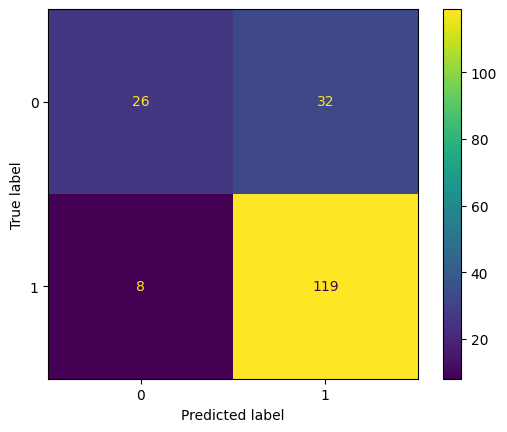

In [18]:
# Validation fo model with confusion matrix and classification report
y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_predicted)
cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()

In [19]:
# classification report 

cr = classification_report(y_test, y_predicted)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.45      0.57        58
           1       0.79      0.94      0.86       127

    accuracy                           0.78       185
   macro avg       0.78      0.69      0.71       185
weighted avg       0.78      0.78      0.76       185



In [20]:
X_train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area'],
      dtype='object')

In [21]:
train_copy[num_cols]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


In [22]:
train_copy[num_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [23]:
model.__class__

sklearn.ensemble._forest.RandomForestClassifier

In [24]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_compute_oob_predictions',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_oob_predictions',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score_and_attributes',
 '_validate_X_predict',
 '_validate_data',
 '_validate

In [25]:
type(test[test.columns[7]].mode())

pandas.core.series.Series

In [26]:
import numpy as np
x = [1, 2, 3, 4, 5]
y = np.log(x)
y

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791])

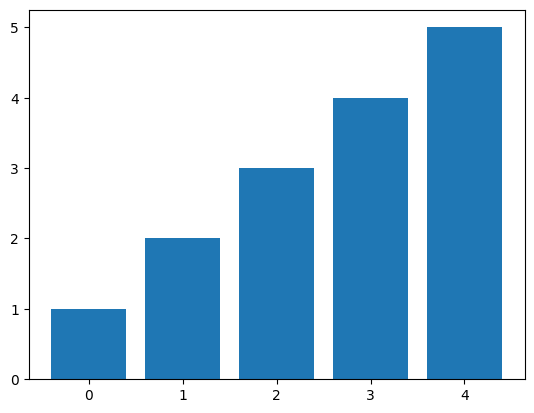

In [27]:
import matplotlib.pyplot as plt
plt.bar(x=range(0,len(x)), height=x)
plt.show()

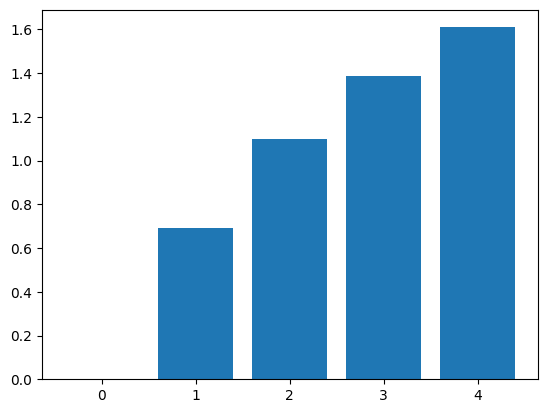

In [28]:
plt.bar(x=range(0,len(x)), height=y)
plt.show()

In [29]:
np.log(test[col])

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

In [ ]:
col = 'ApplicantIncome'
labels = len(test[col])
height = test[col]
plt.bar(x=range(0,labels), height=height)
plt.show()

In [ ]:
np.log10(1000), 10 ** 3 == 1000

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

class LabelEncode(BaseEstimator, TransformerMixin):
    def __init__(self, cols:list) -> None:
        """Args: cols (list)
            Return: None"""
        self.cols = cols
        
    def fit(self, X:pd.DataFrame, y=None):
        """Args: X (Pandas DataFrame)
            Return: self"""
        self.encoder = LabelEncoder()
        return self

    def transform(self, X:pd.DataFrame) -> pd.DataFrame:
        """Args: Nothing to show
            Return: X (Label Encoded pandas dataframe)"""
        X = X.copy()
        for col in self.cols:
            X[col] = self.encoder.fit_transform(X[col])
        return X
    

In [30]:
encoder = LabelEncode(cols=['Gender', 
                'Married', 
                'Dependents', 
                'Education', 
                'Self_Employed', 
                'Credit_History', 
                'Property_Area'])

NameError: name 'LabelEncode' is not defined

In [31]:
encoder.fit(X=test)

TypeError: LabelEncoder.fit() got an unexpected keyword argument 'X'

In [32]:
encoder.transform(X=test)

TypeError: LabelEncoder.transform() got an unexpected keyword argument 'X'

In [33]:

class DropCols(BaseEstimator, TransformerMixin):
    def __init__(self, cols:list) -> None:
        """Args: cols (list)
            Return: None"""
        self.cols = cols
        
    def fit(self, X:pd.DataFrame, y=None):
        """Args: X (Pandas DataFrame)
            Return: self"""
        return self

    def transform(self, X:pd.DataFrame) -> pd.DataFrame:
        """Args: Nothing to show
            Return: X (with dropped columns)"""
        X = X.drop(self.cols, axis='columns')
        return X
    

NameError: name 'BaseEstimator' is not defined

In [34]:
dropper = DropCols(['Gender', 
                'Married', 
                'Dependents', 
                'Education', 
                'Self_Employed', 
                'Credit_History', 
                'Property_Area'])

NameError: name 'DropCols' is not defined

In [35]:
dropper.fit(X=test)

NameError: name 'dropper' is not defined

In [36]:
dropper.transform(X=test)

NameError: name 'dropper' is not defined

In [37]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
357,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113,360.0,1.0,Urban
358,LP002975,Male,Yes,0,Graduate,No,4158,709,115,360.0,1.0,Urban
359,LP002980,Male,No,0,Graduate,No,3250,1993,126,360.0,NaN,Semiurban
360,LP002986,Male,Yes,0,Graduate,No,5000,2393,158,360.0,1.0,Rural
